“I am aware of and understand the collaboration and use of outside resource policy for this
assignment, and affirm I have followed this policy in the completion of this assignment. I am
aware of the course and campus policies on Academic Integrity and am aware of the consequences if this policy is not adhered to.”

I worked with Emma and had some insight from Hannah and Jayke, and of course had guidance from Roman

In [956]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
import math
import cmath

I found the value for the charge of the electron from https://en.wikipedia.org/wiki/Elementary_charge and the mass of an electron in grams from https://en.wikipedia.org/wiki/Electron accessed Nov 5th 2022

The equation for coulumb's law looks slightly different than how its typically presented, like below. 

$F = \frac{q_1q_2}{r^2}\hat r$

The denominator has an $r^3$ because $\hat r = \vec r / r$ , so we need to incorparate that other magnitude of the distance and then its direction, giving us 

$F = \frac{q_1q_2}{r^3}\vec r$

In [911]:
#initial conditions
dt = 1e-18
N = 10000

def columb(rad):
    #this function uses coulumbs law to find and return the force given a radius 
    
    qp = 100*4.8e-10 #statcoulumbs
    qn = -4.8e-10 #statcoulumbs
    force = ((qp*qn)/(np.sqrt(rad[0]**2+rad[1]**2))**3) *(rad)
    #print(force)
    return force


In [957]:
def simulation(r0,v0):
    #this function takes in an initial position vector and an initial velocity vector 
    #and calculates the distance, velocity, acceleration in x and y over time
    #it plots these values and returns them as arrays
    mass = 9e-28 #grams
    
    r = np.zeros([N,2])
    v = np.zeros([N,2])
    a = np.zeros([N,2])
    
    r[0] = r0
    v[0] = v0

    #here is where we actual calculate the changing radius, velocity, and acceleration
    #this chunk is guided by Roman's example but applied to our specific scenario
    for i in range(N):
        a[i] = columb(r[i])/mass
        if i == N-1:
            break
        v[i+1] = v[i] + a[i]*dt
        r[i+1] = r[i] + v[i]*dt + (0.5)*a[i]*dt**2
        
    
    #here we plot all the many different values we find
    plt.plot(r.T[0], r.T[1], color = 'g') #thank you roman for this handy trick for separating two dimensional arrays
    plt.plot(0,0,marker = '*')
    plt.title('Position X vs Y')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([-0.1e-5,0.1e-5])
    plt.ylim([-0.1e-5,0.1e-5])
    plt.grid()
    plt.show()
    
    plt.plot(r.T[0], color = 'g')
    plt.title('Position vs Time')
    plt.xlabel('time (s)')
    plt.ylabel('X')
    #plt.xlim([0.4e9,0.7e9])
    plt.grid()
    plt.show()
    
    plt.plot(r.T[1], color = 'g')
    plt.title('Position Time')
    plt.xlabel('time (s)')
    plt.ylabel('Y')
    #plt.xlim([0.4e9,0.7e9])
    plt.grid()
    plt.show()
    
    plt.plot(v.T[0], color = 'b')
    plt.title('X Velocity vs Time')
    plt.xlabel('time (s)')
    plt.ylabel('velocity (cm/s)')
    #plt.xlim([-1,5])
    #plt.ylim([-10,1000])
    plt.grid()
    plt.show()

    plt.plot(v.T[0], color = 'r')
    plt.title('Y Velocity vs Time')
    plt.xlabel('time (s)')
    plt.ylabel('velocity (cm/s)')
    #plt.xlim([0.4e9,0.7e9])
    plt.grid()
    plt.show()
    
    plt.plot(a.T[0], color = 'b')
    plt.title('X Acceleration vs Time')
    plt.xlabel('time (s)')
    plt.ylabel('acceleration (cm/s/s)')
    #plt.xlim([1,100])
    #plt.ylim([-0.1e17,0.1e17])
    plt.grid()
    plt.show()
    
    plt.plot(a.T[1], color = 'r')
    plt.title('Y Acceleration vs Time')
    plt.xlabel('time (s)')
    #plt.xlim([0.4e9,0.7e9])
    plt.ylabel('acceleration (cm/s/s)')
    plt.grid()
    plt.show()

    return r,v,a

We are going to compute our fourier transform now. I made it into a function that is easily callable for the different initial conditions we give. 

We will use the equation from lecture that states (slightly reorganized)

$d(\omega) = \frac{e}{2\pi \omega^2} \int a e^{-i\omega t}dt$

Over a range of frequencies I chose (1->100), I make a list of values of the time integral of this equation. 

In [978]:
def fourier(ro,vo,ao):
    #computes the fourier transform given radius, velocity, and acceleration over time
    #returns 4 plots: the FFT transform and the manual transform in x and y acceleration
   
    #here we will do the FFT as a check for the manual transform later
    ytrans = fft.fft(ro.T[1])
    yamp = (2/N)* np.abs(ytrans[:N//4]) 
    #thank you Roman for this handy notation to show just the first fourth of the FFT 
    #because it drops to zero at higher values and is therefore not relevent
    yfreq = fft.fftfreq(N,dt)[:N//4] 

    plt.plot(yfreq,yamp)
    plt.title('Y acceleration Fourier by FFT')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.grid()
    plt.show()

    xtrans = fft.fft(ro.T[0])
    xamp = (2/N)* np.abs(xtrans[:N//4])
    xfreq = fft.fftfreq(N,dt)[:N//4] 

    plt.plot(xfreq,xamp)
    plt.title('X acceleration Fourier by FFT')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.grid()
    plt.show()

    #now we do the transform by hand, as I explained above
    omega = []
    peaky = []
    for o in range(1,100):    
        omega.append(o)
        exy = []

        for i in range(len(ao[0])):
            exy.append(cmath.exp(-1j*i*o))

        foury = []
        qn = -4.8e-10
        for i in range(len(exy)):
            foury.append(ao[1][i]*exy[i])
        peaky.append(-qn/(2*math.pi*o**2)* np.trapz(foury))


    plt.plot(peaky, color = 'r')
    plt.title('Y acceleration Fourier by hand')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.grid()
    plt.show()

    omega = []
    peakx = []
    for o in range(1,100):    
        omega.append(o)
        exx = []

        for i in range(len(ao[0])):
            exx.append(cmath.exp(-1j*i*o))

        fourx = []
        qn = -4.8e-10
        for i in range(len(exx)):
            fourx.append(ao[1][i]*exx[i])
        peakx.append(-qn/(2*math.pi*o**2)* np.trapz(fourx))


    plt.plot(peakx, color = 'b')
    plt.title('X acceleration Fourier by hand')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.grid()
    plt.show()

The following plots work as expected. The electron is tugged towards the particle at the origin, shown as a blue star. It's initial velocity keeps it from falling directly into the particle, and it instead loops around it in some cases, or is otherwise deflected. 

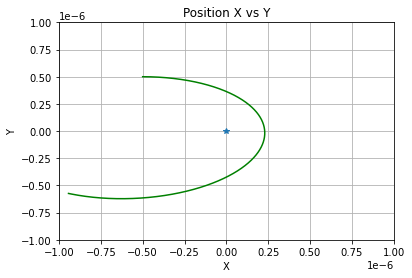

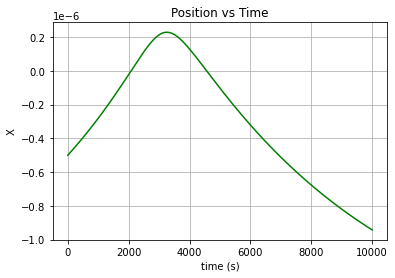

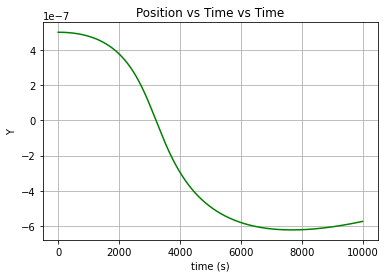

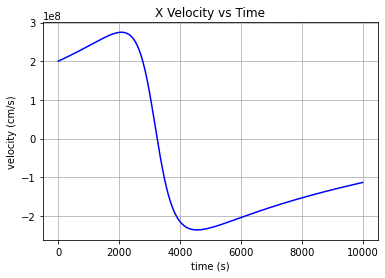

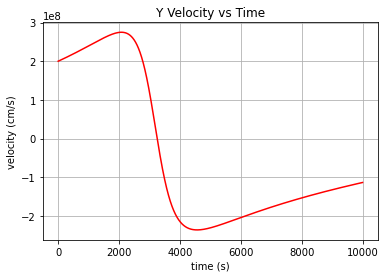

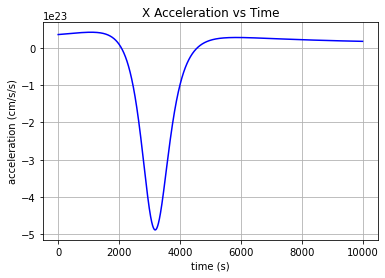

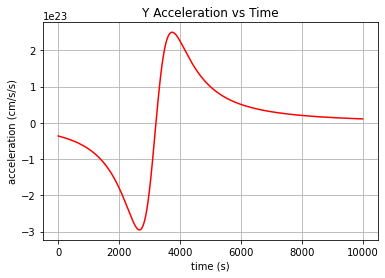

(array([[-5.00000000e-07,  5.00000000e-07],
        [-4.99799982e-07,  4.99999982e-07],
        [-4.99599928e-07,  4.99999928e-07],
        ...,
        [-9.42657863e-07, -5.73697661e-07],
        [-9.42771689e-07, -5.73660651e-07],
        [-9.42885497e-07, -5.73623629e-07]]),
 array([[ 2.00000000e+08,  0.00000000e+00],
        [ 2.00036204e+08, -3.62038672e+04],
        [ 2.00072415e+08, -7.24294659e+04],
        ...,
        [-1.13834991e+08,  3.70050648e+07],
        [-1.13817032e+08,  3.70159942e+07],
        [-1.13799076e+08,  3.70269205e+07]]),
 array([[ 3.62038672e+22, -3.62038672e+22],
        [ 3.62111084e+22, -3.62255987e+22],
        [ 3.62183505e+22, -3.62473484e+22],
        ...,
        [ 1.79583332e+22,  1.09293670e+22],
        [ 1.79566938e+22,  1.09263449e+22],
        [ 1.79550549e+22,  1.09233240e+22]]))

In [964]:
radius, velocity, accel = simulation([-5e-7,5e-7],[2e8,0])
fourier(radius,velocity,accel)
#intitial x position is about 1000 bohr radii to the left of the origin 
#initial y position is about 1000 bohr radii above the origin 
#initial x velocity is high but not quite relativistic and to the right
#initial y velocity is 0

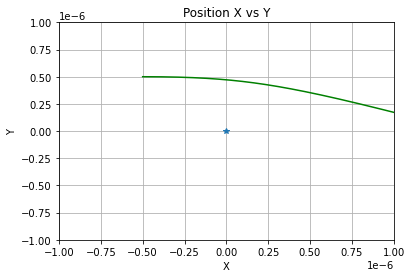

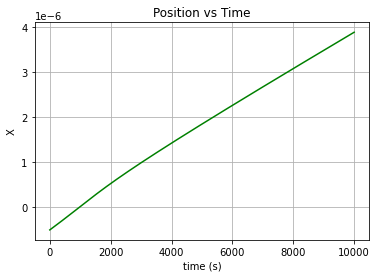

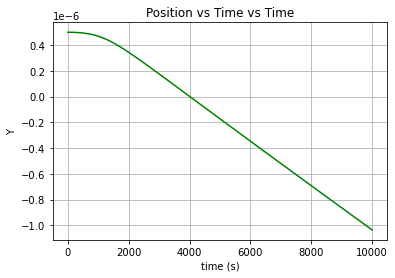

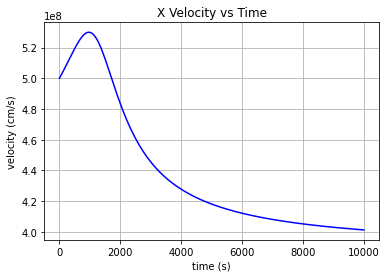

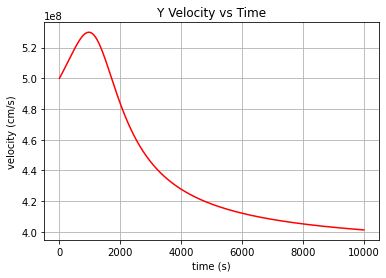

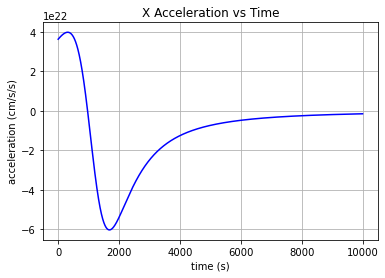

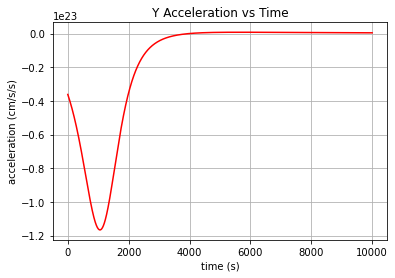

(array([[-5.00000000e-07,  5.00000000e-07],
        [-4.99499982e-07,  4.99999982e-07],
        [-4.98999928e-07,  4.99999928e-07],
        ...,
        [ 3.88521607e-06, -1.03598875e-06],
        [ 3.88561732e-06, -1.03616010e-06],
        [ 3.88601857e-06, -1.03633145e-06]]),
 array([[ 5.00000000e+08,  0.00000000e+00],
        [ 5.00036204e+08, -3.62038672e+04],
        [ 5.00072426e+08, -7.24620836e+04],
        ...,
        [ 4.01250579e+08, -1.71353408e+08],
        [ 4.01249049e+08, -1.71353000e+08],
        [ 4.01247520e+08, -1.71352592e+08]]),
 array([[ 3.62038672e+22, -3.62038672e+22],
        [ 3.62219581e+22, -3.62582164e+22],
        [ 3.62400270e+22, -3.63126523e+22],
        ...,
        [-1.52990187e+21,  4.07946712e+20],
        [-1.52956699e+21,  4.07882753e+20],
        [-1.52923223e+21,  4.07818807e+20]]))

In [963]:
radius,velocity,accel = simulation([-5e-7,5e-7],[5e8,0])
fourier(radius,velocity,accel)
#here I more than double the x velocity
#we can see that the electron does not do a loop around the particle because of this increase in velocity

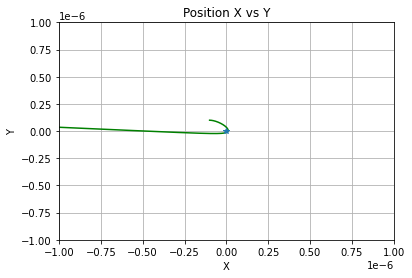

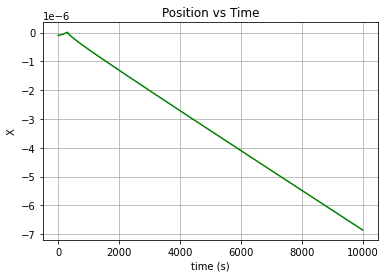

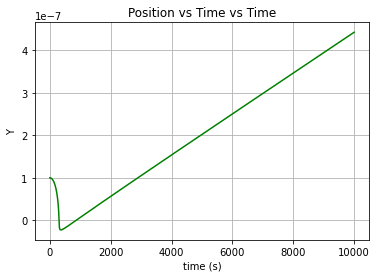

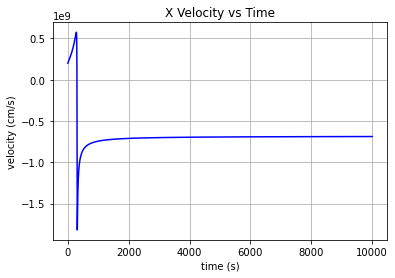

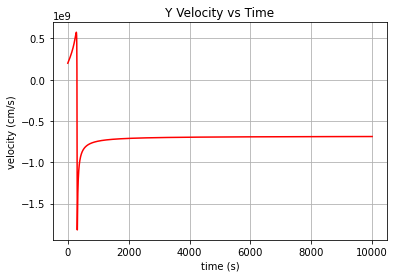

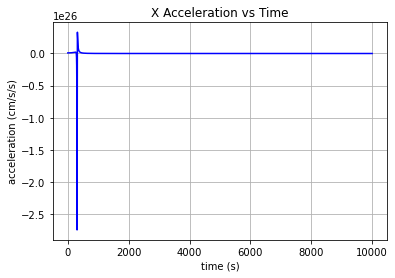

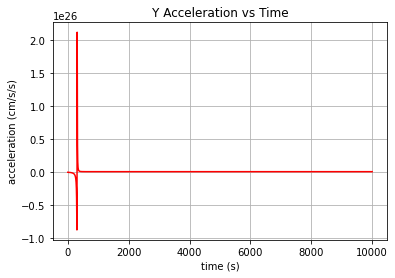

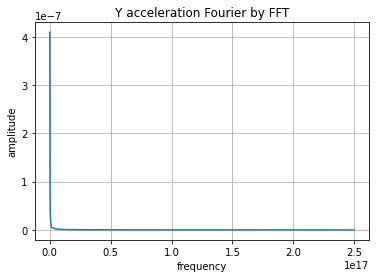

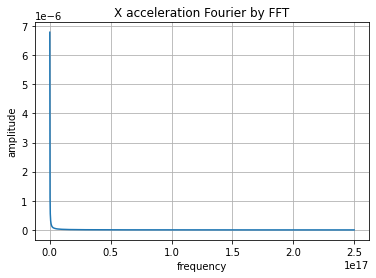

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


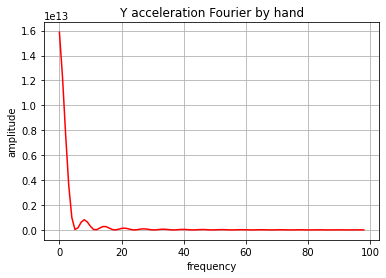

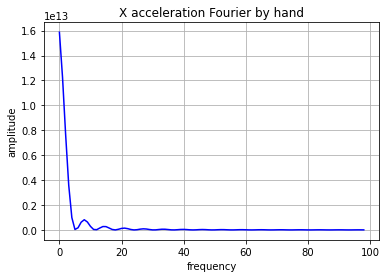

In [976]:
radius,velocity,accel = simulation([-1e-7,1e-7],[2e8,0])
fourier(radius,velocity,accel)
#here i decreased the distance
#the particle is slingshot the opposite way it came in

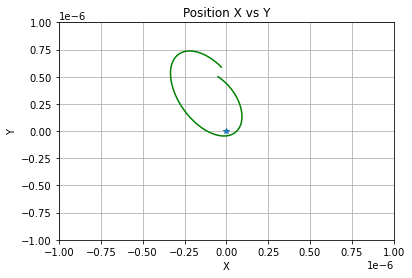

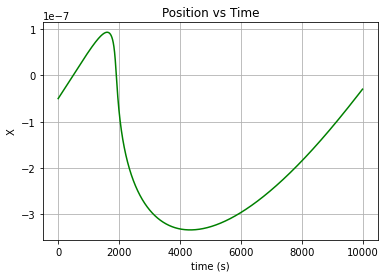

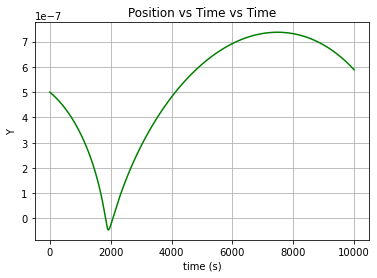

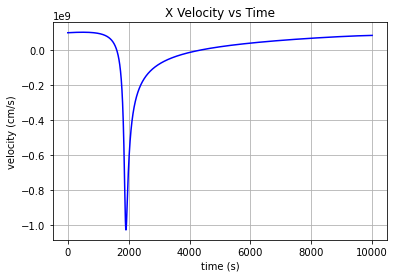

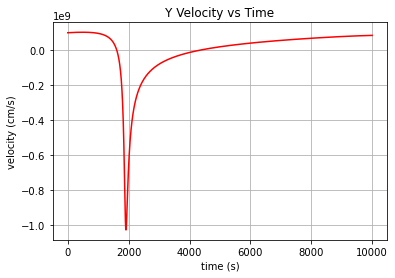

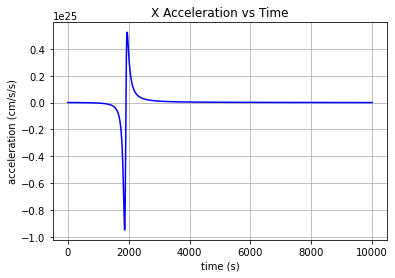

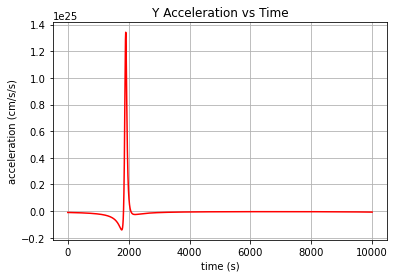

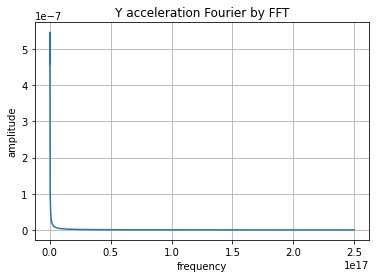

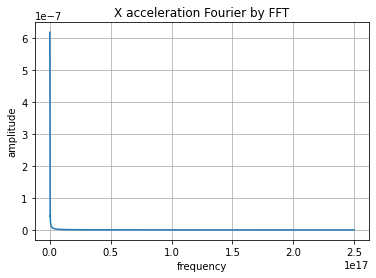

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


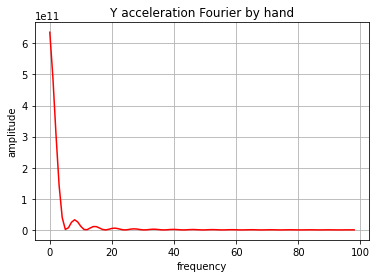

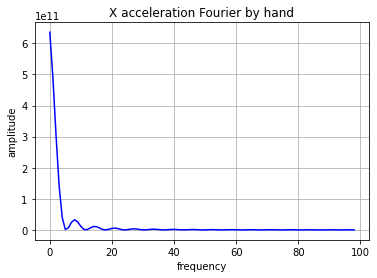

In [973]:
radius, velocity, accel = simulation([-5e-8,5e-7],[1e8,-1e8])
fourier(radius,velocity,accel)
#here there is a downward y velocity
#the particle will be tugged down by the particle so with that initial y velocity, the loop is much tighter around the particle

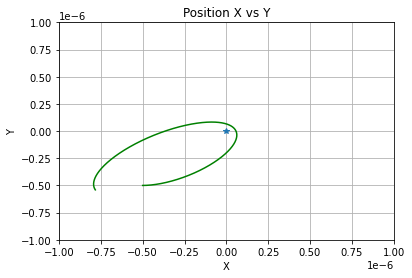

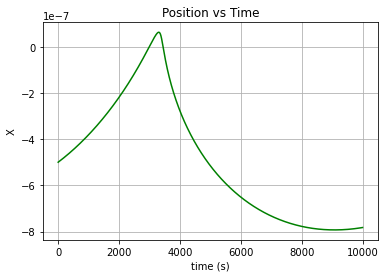

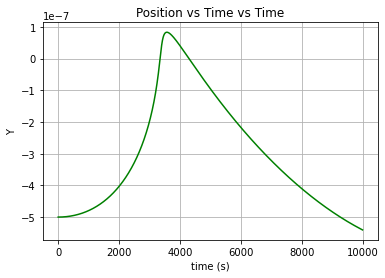

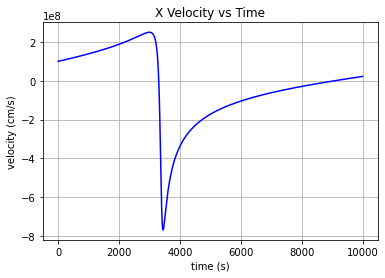

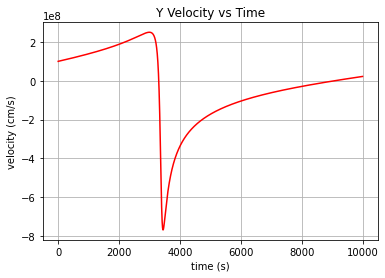

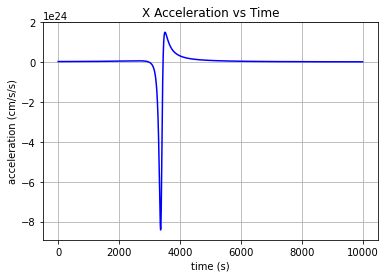

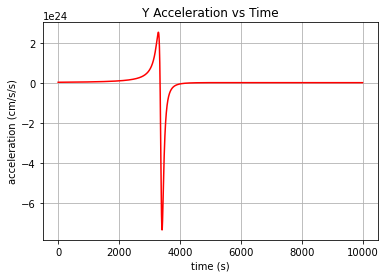

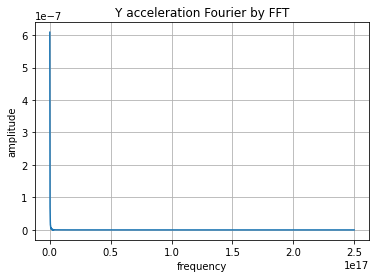

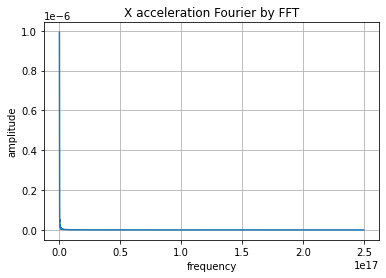

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


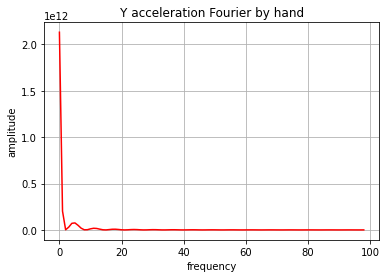

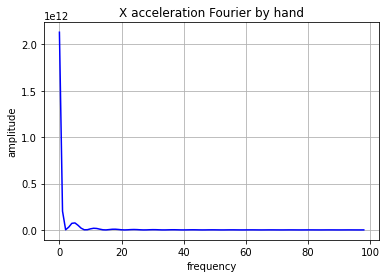

In [993]:
radius, velocity, accel = simulation([-5e-7,-5e-7],[1e8,0])

fourier(radius,velocity,accel)

#here, the electron starts to the lower left of the instead of the upper left of the particle
#the electron is still tugged towards the particle, up instead of down